## Imports and dependencies

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
import warnings
warnings.filterwarnings("ignore")

## Data Pre-processing

Load the CSV file and look at the top 5 rows.

In [2]:
amazon_train = pd.read_csv('./data/amazon_review_ID.shuf.lrn.csv')
amazon_test = pd.read_csv('./data/amazon_review_ID.shuf.tes.csv')

In [3]:
amazon_train.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,0,8,6,10,6,7,2,2,2,3,...,1,0,0,0,0,0,0,0,0,Chell
1,1,13,1,13,9,8,8,2,3,2,...,4,1,2,1,0,1,0,0,0,Engineer
2,2,16,7,6,7,9,3,4,2,6,...,0,0,0,0,1,0,0,0,0,Grove
3,3,8,11,10,11,3,7,0,4,2,...,0,0,1,0,0,0,2,1,0,Davisson
4,4,10,11,8,5,3,4,2,5,5,...,0,0,0,0,0,0,0,0,0,Wilson


In [4]:
amazon_train.shape

(750, 10002)

In [5]:
amazon_test.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
0,750,15,10,6,7,9,3,3,3,1,...,0,0,1,1,0,0,0,0,0,0
1,751,8,10,7,2,5,7,2,5,3,...,0,4,0,0,0,0,0,2,1,0
2,752,18,9,7,8,8,7,12,6,7,...,0,0,1,0,0,0,1,0,0,1
3,753,6,5,4,2,4,1,1,1,0,...,0,2,0,0,0,0,0,1,0,0
4,754,9,3,2,5,9,3,0,3,2,...,0,0,0,0,0,0,0,1,0,0


Check for missing values and inspect details about the dataset

In [6]:
amazon_train.isnull().sum()

ID        0
V1        0
V2        0
V3        0
V4        0
         ..
V9997     0
V9998     0
V9999     0
V10000    0
Class     0
Length: 10002, dtype: int64

In [7]:
amazon_test.isnull().sum()

ID        0
V1        0
V2        0
V3        0
V4        0
         ..
V9996     0
V9997     0
V9998     0
V9999     0
V10000    0
Length: 10001, dtype: int64

In [8]:
amazon_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Columns: 10002 entries, ID to Class
dtypes: int64(10001), object(1)
memory usage: 57.2+ MB


In [9]:
amazon_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Columns: 10001 entries, ID to V10000
dtypes: int64(10001)
memory usage: 57.2 MB


In [10]:
amazon_train.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,374.50000,11.810667,7.424000,6.745333,6.502667,6.140000,4.641333,3.730667,3.614667,2.941333,...,0.210667,0.244000,0.205333,0.192000,0.224000,0.220000,0.216000,0.182667,0.229333,0.192000
std,216.65064,5.715684,3.473948,3.368819,3.872034,3.241977,2.826661,3.988568,2.322364,2.109619,...,0.547740,0.681971,0.517231,0.594087,0.568849,0.488451,0.502342,0.467894,0.496388,0.512008
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.25000,8.000000,5.000000,4.000000,4.000000,4.000000,2.250000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,374.50000,11.000000,7.000000,7.000000,6.000000,6.000000,4.000000,2.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,561.75000,15.000000,10.000000,9.000000,9.000000,8.000000,6.000000,6.000000,5.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,749.00000,32.000000,21.000000,20.000000,25.000000,19.000000,14.000000,21.000000,14.000000,13.000000,...,4.000000,6.000000,4.000000,8.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000


Label Encoding for the class property.

In [14]:
classes = amazon_train['Class'].unique()
classes

array(['Chell', 'Engineer', 'Grove', 'Davisson', 'Wilson', 'Brody',
       'Lovitt', 'Vision', 'Morrison', 'Nigam', 'Johnson', 'Koenig',
       'Mitchell', 'Ashbacher', 'McKee', 'Robert', 'Calvinnme', 'Goonan',
       'Peterson', 'Vernon', 'Merritt', 'Riley', 'Walters', 'Agresti',
       'Lee', 'Kolln', 'Lawyeraau', 'Shea', 'Power', 'Chachra', 'Harp',
       'Chandler', 'Auken', 'Neal', 'Mark', 'Cholette', 'Blankenship',
       'Janson', 'Hayes', 'Taylor', 'Sherwin', 'Bukowsky', 'Corn', 'Dent',
       'Messick', 'Mahlers2nd', 'CFH', 'Cutey', 'Comdet', 'Brown'],
      dtype=object)

In [15]:
le = LabelEncoder().fit(classes)

In [16]:
amazon_train['Class'] = le.transform(amazon_train['Class'])

Lets check class counts.

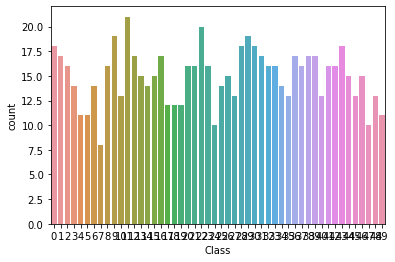

In [30]:
sns.countplot(amazon_train['Class'])

If you want to try one-hot encoding of the class run the code below:

In [101]:
ohe = OneHotEncoder(sparse=False).fit(amazon_train[['Class']])

In [102]:
amazon_train['Class'] = ohe.transform(amazon_train[['Class']])
# waiter_tips['smoker'] = ohe.fit_transform(waiter_tips[['smoker']])

In [17]:
amazon_train.tail()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
745,745,9,8,5,5,6,2,14,1,4,...,0,1,0,0,1,0,1,0,0,41
746,746,6,13,4,6,8,2,7,3,3,...,0,0,0,0,1,0,0,0,1,37
747,747,16,11,4,9,9,4,0,3,5,...,0,0,0,0,0,1,1,0,4,34
748,748,9,5,4,2,3,7,2,7,1,...,0,0,0,0,0,2,0,0,0,35
749,749,11,2,7,3,10,2,2,3,5,...,0,0,0,2,1,0,0,0,0,13


In [18]:
amazon_test.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
0,750,15,10,6,7,9,3,3,3,1,...,0,0,1,1,0,0,0,0,0,0
1,751,8,10,7,2,5,7,2,5,3,...,0,4,0,0,0,0,0,2,1,0
2,752,18,9,7,8,8,7,12,6,7,...,0,0,1,0,0,0,1,0,0,1
3,753,6,5,4,2,4,1,1,1,0,...,0,2,0,0,0,0,0,1,0,0
4,754,9,3,2,5,9,3,0,3,2,...,0,0,0,0,0,0,0,1,0,0


Lets look at the correlations between features. We can drop the columns that have a low correlation to speed up the model training and improve accuracy.

In [19]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(amazon_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,-374.048631,70.662747
1,-373.630202,-33.936933
2,-372.649969,-37.658022
3,-371.769079,-18.780135
4,-370.593830,2.923131
...,...,...
745,370.675969,1.065571
746,371.113364,-80.606700
747,372.377540,-8.492619
748,373.962303,87.893127


In [ ]:
# Note calculating correlations between 10,000 features takes time 
# Run at your own risk
corr = amazon_train.corr()

In [ ]:
# Get absolute values
abs_corr = corr.abs()

# Select upper triangle of correlation matrix
upper = abs_corr.where(np.triu(np.ones(abs_corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation less than .5
to_drop = [column for column in upper.columns if any(upper[column] < 0.5)]

to_drop

Now we drop the features that seem to be weakly correlated in our dataset to improve runtime.

In [ ]:
# Drop features 
amazon_train = amazon_train.drop(amazon_train[to_drop], axis=1)
amazon_test = amazon_test.drop(amazon_test[to_drop], axis=1)

In [20]:
# Performs better with no scaling
# sc = StandardScaler()
# X_train = sc.fit_transform(amazon_train)
# X_test = sc.fit_transform(amazon_test)

X_train = amazon_train
X_test = amazon_test

In [21]:
pca = PCA(n_components=275)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents)

principalDf

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
0,8.310665,5.065245,-8.546820,2.659834,-0.604208,-1.049896,-5.378165,3.694703,-0.447975,5.020304,...,2.569255,2.738421,-3.299972,-4.707862,-3.152449,-2.804762,7.885215,-2.329906,0.289224,-3.186393
1,-1.875467,6.611089,-16.761484,5.480956,-8.726349,2.302674,-4.180735,7.499365,14.808562,3.083331,...,8.759618,3.922109,-5.970155,4.170622,-3.679101,1.231463,-0.460487,-0.284332,3.929826,-0.886120
2,-10.792915,-1.308242,6.269775,-0.432416,-7.879718,5.017116,-3.645032,4.610671,-5.535132,3.319401,...,0.405995,7.538172,-2.106039,1.492776,-0.009616,5.808777,-2.552692,-3.394148,-5.703935,-1.150298
3,-3.924364,-6.143934,-3.793270,19.520772,3.180510,-5.430210,-1.115417,-11.250590,1.097699,-0.942856,...,-8.236457,-0.849256,-2.293603,8.082257,-0.368378,-0.791126,-4.271720,0.881473,1.005457,0.833719
4,-0.713144,-9.002530,2.406905,-5.852970,-3.334200,0.075798,6.111468,-0.440458,-2.497527,-1.233992,...,5.558054,1.969321,5.826726,5.767282,1.163578,2.784820,6.545048,-2.485078,-0.399268,-1.825531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-1.910162,17.192873,3.726467,-6.072381,1.979033,-9.034661,-3.393569,11.211175,-0.043239,-1.922553,...,-6.610943,6.988862,1.178826,-2.180743,2.528232,1.639375,-1.863912,-1.372115,-2.025199,-4.543347
746,-0.833199,-5.472331,5.083199,-4.670366,0.890420,4.302984,6.913278,-14.656722,-4.678527,9.545949,...,-0.405048,3.366243,-1.349290,4.141106,-0.514828,2.968717,-0.746081,2.649679,-0.468597,-2.175632
747,-0.825054,-10.427763,0.539552,3.404774,-2.216970,0.777994,-6.847834,4.318364,-1.508927,1.324794,...,1.560147,-1.689849,-5.832635,-0.806153,1.015233,1.992904,-0.211152,1.390042,2.404475,1.291972
748,12.715899,2.568625,4.996149,-0.712934,-3.213201,3.819765,1.207479,1.698625,4.271400,-1.635369,...,-1.730442,1.864586,1.399177,-0.513772,-1.336875,3.126548,1.512429,-3.124966,-0.340668,-0.136726


In [22]:
tsne = TSNE(n_components=3)
tsneComponents = tsne.fit_transform(X_train)
tsneDf = pd.DataFrame(data = tsneComponents)

tsneDf

,0,1,2
0,126.699715,46.328850,-97.040466
1,-13.237917,-7.556045,113.014709
2,91.686920,29.904312,-127.028694
3,-42.056053,-68.244873,-148.445251
4,-108.845802,101.272552,63.654724
...,...,...,...
745,152.855789,42.893383,53.986221
746,-63.507637,-113.114746,55.481571
747,-100.743034,-81.640297,63.581306
748,69.092148,-38.147099,-20.884262


In [23]:
mds = MDS(n_components=100)
mdsComponents = mds.fit_transform(X_train)
mdsDf = pd.DataFrame(data = mdsComponents)

mdsDf

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-3.005730,10.114118,-11.301120,7.672784,12.654092,-7.436961,13.041316,-5.977325,15.946896,10.023858,...,13.697087,6.432292,5.964851,-15.425541,-6.244954,10.340550,10.818329,6.347031,4.844655,6.093511
1,-0.533465,-0.901574,-1.076576,-15.441719,-5.918476,-16.720906,11.135651,-14.488952,-16.366602,1.928392,...,-8.691051,17.673971,-11.599569,8.314266,-8.247543,17.330549,6.480732,23.699347,-7.544115,-4.875033
2,-12.333160,-12.523566,-10.533919,-7.271830,-6.219784,14.236412,-8.776761,16.160268,-15.587572,11.854327,...,-11.575401,0.790651,-7.023873,-16.008779,6.045815,10.811124,3.070519,8.969491,12.476614,16.051373
3,8.712888,11.271006,9.842116,-8.956541,11.537320,-8.670842,16.023111,8.004226,15.243123,1.337471,...,-7.705540,12.923722,-8.307788,16.764790,-11.289770,12.028089,16.448027,3.011208,0.668920,7.779448
4,8.052055,-10.093275,-10.362691,-15.181826,8.737731,-2.647846,12.518328,-1.680089,6.987986,-3.692786,...,-10.385286,3.648941,-2.425930,-1.266938,-5.423371,-5.454495,5.717161,-0.933306,-4.775282,18.774725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-14.461891,3.020571,-6.530047,-9.393011,-7.770200,-4.983715,-2.276520,13.621942,14.393241,11.353144,...,-3.667386,2.142009,13.394780,-9.914032,-9.542493,3.918231,4.668560,3.264593,12.118274,-13.056354
746,-18.357229,-5.496464,-9.325737,14.824947,-16.996704,-11.203480,-14.117600,-16.222922,-7.229164,16.253533,...,-9.938671,-6.697315,20.232473,14.104071,-12.890368,-13.739952,-16.920476,-9.955813,-8.400339,-10.380149
747,3.177207,2.553692,-13.457673,14.149322,4.159386,-14.906810,13.889291,-6.816241,10.734869,-9.151905,...,-8.370940,-7.045291,15.280406,4.416790,-7.785866,2.448671,-1.643701,7.957181,-11.844838,1.389366
748,-4.672173,-4.514647,-11.714264,7.508396,-9.242112,-8.026717,-0.586355,16.068785,10.444167,8.469984,...,5.322744,-13.022284,4.492796,-7.913314,1.999754,9.807770,-8.422497,3.032290,-6.481571,0.276331


In [24]:
y_train = amazon_train['Class']
X_train = amazon_train.drop(['Class'], axis=1)
X_train_pca = principalDf
X_train_tsne = tsneDf
X_train_mds = mdsDf
# X, y is our training data set

## Models

In [25]:
models = []
models.append(('LogisticRegression', LogisticRegression(solver='lbfgs')))
models.append(('NaiveBayes', GaussianNB()))
models.append(('GradientDescent', SGDClassifier()))
models.append(('SupportVectorClassifier', SVC(gamma='scale')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier(n_estimators=100)))

In [26]:
for name,model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
    results = model_selection.cross_val_score(model, X_train, y_train, cv= kfold, scoring = 'accuracy')
    msg  = "%s: %f" % (name, results.mean())
    print(msg)

LogisticRegression: 0.613257
NaiveBayes: 0.337856
GradientDescent: 0.241444
SupportVectorClassifier: 0.061677
KNN: 0.042212
DecisionTree: 0.380083
RandomForest: 0.577654


In [27]:
for name,model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
    results = model_selection.cross_val_score(model, X_train_pca, y_train, cv= kfold, scoring = 'accuracy')
    msg  = "%s: %f" % (name, results.mean())
    print(msg)

LogisticRegression: 0.660847
NaiveBayes: 0.313862
GradientDescent: 0.536466
SupportVectorClassifier: 0.384556
KNN: 0.193470
DecisionTree: 0.151819
RandomForest: 0.360951


In [28]:
for name,model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
    results = model_selection.cross_val_score(model, X_train_tsne, y_train, cv= kfold, scoring = 'accuracy')
    msg  = "%s: %f" % (name, results.mean())
    print(msg)

LogisticRegression: 0.100008
NaiveBayes: 0.143589
GradientDescent: 0.011182
SupportVectorClassifier: 0.174280
KNN: 0.131792
DecisionTree: 0.128871
RandomForest: 0.165209


In [29]:
for name,model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
    results = model_selection.cross_val_score(model, X_train_mds, y_train, cv= kfold, scoring = 'accuracy')
    msg  = "%s: %f" % (name, results.mean())
    print(msg)

LogisticRegression: 0.073933
NaiveBayes: 0.085336
GradientDescent: 0.062795
SupportVectorClassifier: 0.067127
KNN: 0.036635
DecisionTree: 0.042304
RandomForest: 0.079241


## LogisticRegression

In [31]:
# To perform exhaustive search for best parameters run the commented code 
# Note - takes a long time to run
# lr = LogisticRegression()

# # Define grid (possible parameter space)
# grid = {'C': np.logspace(-3,3,7), 'penalty': ['l2'], 'solver': ['newton-cg', 'sag', 'lbfgs']}


# lr_cv = GridSearchCV(lr, grid, cv=5) # Alternarively RandomSearchCV

# lr_cv.fit(X_train, y_train)

lr = LogisticRegression(C = 100, penalty = 'l2', solver = 'newton-cg')
kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
results = model_selection.cross_val_score(lr, X_train, y_train, cv= kfold, scoring = 'accuracy')

results.mean()

0.6277828815871855

In [32]:
lr.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred_lr = lr.predict(amazon_test)

In [35]:
y_pred_lr = le.inverse_transform(y_pred_lr)
y_pred_lr

array(['Hayes', 'Hayes', 'Goonan', 'Dent', 'Engineer', 'Johnson',
       'Morrison', 'Harp', 'Shea', 'Shea', 'Chachra', 'Merritt',
       'Davisson', 'Walters', 'Hayes', 'Messick', 'Chell', 'Mahlers2nd',
       'Walters', 'Dent', 'Calvinnme', 'Auken', 'Lawyeraau', 'Koenig',
       'Shea', 'Agresti', 'Cutey', 'Lee', 'Koenig', 'Brown', 'Cholette',
       'Agresti', 'Chachra', 'Robert', 'Hayes', 'CFH', 'Corn', 'Harp',
       'Shea', 'Cutey', 'Riley', 'Messick', 'Morrison', 'Ashbacher',
       'CFH', 'Merritt', 'Riley', 'Chandler', 'Auken', 'Chachra',
       'Koenig', 'Vision', 'Janson', 'Robert', 'Chachra', 'Walters',
       'Chandler', 'Agresti', 'Agresti', 'Engineer', 'Mark', 'Goonan',
       'Vision', 'Sherwin', 'Johnson', 'Vernon', 'Calvinnme', 'Peterson',
       'Dent', 'Taylor', 'Ashbacher', 'Harp', 'Mark', 'Blankenship',
       'Auken', 'Chachra', 'Auken', 'Riley', 'Lovitt', 'Auken',
       'Mahlers2nd', 'Kolln', 'Ashbacher', 'Brown', 'Brown', 'Engineer',
       'Johnson', 'Auken',

In [36]:
output = pd.DataFrame([amazon_test.ID, y_pred_lr], ['ID', 'Class']).transpose()
export_csv = output.to_csv ('results_lr.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

## GradientDescent

In [37]:
# To perform exhaustive search for best parameters run the commented code 
# Note - takes a long time to run
# gd = SGDClassifier()

# # Define grid (possible parameter space)
# grid = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
#         'penalty': ['l1','l2','elasticnet'], 
#         'eta0': [0.01],
#         'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
#        }


# gd_cv = GridSearchCV(gd, grid, cv=5)

# gd_cv.fit(X_train_scaled, y_train)
gd = SGDClassifier(eta0=0.01, learning_rate='adaptive', loss='squared_hinge', penalty='l1')

kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
results = model_selection.cross_val_score(gd, X_train, y_train, cv= kfold, scoring = 'accuracy')

results.mean()

0.4315869185892821

In [38]:
gd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.01, fit_intercept=True,
              l1_ratio=0.15, learning_rate='adaptive', loss='squared_hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
y_pred_gd = gd.predict(amazon_test)

In [40]:
y_pred_gd = le.inverse_transform(y_pred_gd)
y_pred_gd

array(['Vision', 'Hayes', 'Corn', 'Koenig', 'Engineer', 'Johnson',
       'Morrison', 'Messick', 'Shea', 'Koenig', 'Chachra', 'Merritt',
       'CFH', 'Messick', 'Vision', 'Messick', 'Koenig', 'Mahlers2nd',
       'Koenig', 'Koenig', 'Calvinnme', 'Auken', 'Lawyeraau', 'Koenig',
       'Koenig', 'Mitchell', 'Cutey', 'Lee', 'Koenig', 'Corn', 'Cholette',
       'Koenig', 'Chachra', 'Robert', 'Wilson', 'Koenig', 'Corn', 'Harp',
       'Shea', 'Brown', 'Riley', 'Wilson', 'Morrison', 'Ashbacher',
       'Koenig', 'Auken', 'Riley', 'McKee', 'Dent', 'Vision', 'Wilson',
       'Vision', 'Corn', 'Robert', 'Chachra', 'Koenig', 'Corn', 'Koenig',
       'Koenig', 'Engineer', 'Koenig', 'Koenig', 'Vision', 'Sherwin',
       'Corn', 'Koenig', 'Koenig', 'Messick', 'Shea', 'Taylor', 'Corn',
       'Harp', 'Mark', 'Blankenship', 'Auken', 'Chachra', 'Auken', 'Corn',
       'Mitchell', 'Hayes', 'Mahlers2nd', 'Robert', 'Corn', 'Hayes',
       'Brown', 'Engineer', 'Chell', 'Bukowsky', 'Dent', 'Dent', 'Shea',

In [41]:
output = pd.DataFrame([amazon_test.ID, y_pred_gd], ['ID', 'Class']).transpose()
export_csv = output.to_csv ('results_gd.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

## DecisionTree

In [42]:
# To perform exhaustive search for best parameters run the commented code 
# Note - takes a long time to run
# dt = DecisionTreeClassifier()

# # Define grid (possible parameter space)
# # Note running this takes some time
# grid = {'criterion': ['gini', 'entropy'],
#         'splitter': ['best','random'], 
#         'max_depth': np.arange(1, 10,1),
#         'min_samples_split': np.arange(0.1,1,0.1),
#         'max_leaf_nodes': np.arange(2,10,1),
#         'max_features': np.arange(1,6,1)
#        }


# dt_cv = GridSearchCV(dt, grid, cv=5)

# dt_cv.fit(X_train_scaled, y_train)
dt = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 100, max_leaf_nodes = 320)

kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
results = model_selection.cross_val_score(dt, X_train, y_train, cv= kfold, scoring = 'accuracy')

results.mean()

0.36724245540964306

In [43]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
                       max_features=None, max_leaf_nodes=320,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
y_pred_dt = dt.predict(amazon_test)

In [45]:
y_pred_dt = le.inverse_transform(y_pred_dt)
y_pred_dt

array(['Blankenship', 'Cutey', 'Riley', 'Peterson', 'Agresti', 'Johnson',
       'Morrison', 'Harp', 'Shea', 'Goonan', 'Chachra', 'Merritt',
       'Davisson', 'Walters', 'Riley', 'McKee', 'Chell', 'Mahlers2nd',
       'Engineer', 'CFH', 'Blankenship', 'Robert', 'Agresti', 'Corn',
       'Auken', 'Engineer', 'McKee', 'Corn', 'Koenig', 'Goonan',
       'Peterson', 'Kolln', 'Chandler', 'CFH', 'Lawyeraau', 'CFH',
       'Chachra', 'Harp', 'Shea', 'Chachra', 'Chachra', 'Chell',
       'Morrison', 'Brody', 'CFH', 'Sherwin', 'Nigam', 'Chandler',
       'Walters', 'McKee', 'Brody', 'Vision', 'Nigam', 'Calvinnme',
       'Robert', 'Walters', 'Chandler', 'Lee', 'CFH', 'Agresti',
       'Blankenship', 'Goonan', 'McKee', 'Sherwin', 'Johnson', 'Vernon',
       'Hayes', 'Peterson', 'Mahlers2nd', 'Taylor', 'Lawyeraau', 'Harp',
       'Mark', 'Blankenship', 'Calvinnme', 'Corn', 'Vision', 'Calvinnme',
       'Brody', 'Robert', 'Mahlers2nd', 'Sherwin', 'Blankenship', 'Neal',
       'Grove', 'Engineer',

In [46]:
output = pd.DataFrame([amazon_test.ID, y_pred_dt], ['ID', 'Class']).transpose()
export_csv = output.to_csv ('results_dt.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

## RandomForest

In [47]:
# To perform exhaustive search for best parameters run the commented code 
# Note - takes a long time to run
# rf = RandomForestClassifier()

# # Define grid (possible parameter space)
# # Note running this takes more time
# grid = {
#         'criterion': ['gini'], #['gini', 'entropy'],
#         'n_estimators': [47], #np.arange(1,50,1), 
#         'max_depth': [9], #np.arange(1, 10,1),
#         'min_samples_split': [0.1], # np.arange(0.1,1,0.1),
#         'max_leaf_nodes': [5], #np.arange(2,10,1),
#         'max_features': [5] #np.arange(1,6,1),
#        }


# rf_cv = GridSearchCV(rf, grid, cv=5)

# rf_cv.fit(X_train_scaled, y_train)
rf = RandomForestClassifier(criterion='gini', max_depth=100, max_leaf_nodes= 300, n_estimators=47)

kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
results = model_selection.cross_val_score(rf, X_train, y_train, cv= kfold, scoring = 'accuracy')

results.mean()

0.47966874786515923

In [48]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=300,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=47,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
y_pred_rf = dt.predict(amazon_test)

In [50]:
y_pred_rf = le.inverse_transform(y_pred_rf)
y_pred_rf

array(['Blankenship', 'Cutey', 'Riley', 'Peterson', 'Agresti', 'Johnson',
       'Morrison', 'Harp', 'Shea', 'Goonan', 'Chachra', 'Merritt',
       'Davisson', 'Walters', 'Riley', 'McKee', 'Chell', 'Mahlers2nd',
       'Engineer', 'CFH', 'Blankenship', 'Robert', 'Agresti', 'Corn',
       'Auken', 'Engineer', 'McKee', 'Corn', 'Koenig', 'Goonan',
       'Peterson', 'Kolln', 'Chandler', 'CFH', 'Lawyeraau', 'CFH',
       'Chachra', 'Harp', 'Shea', 'Chachra', 'Chachra', 'Chell',
       'Morrison', 'Brody', 'CFH', 'Sherwin', 'Nigam', 'Chandler',
       'Walters', 'McKee', 'Brody', 'Vision', 'Nigam', 'Calvinnme',
       'Robert', 'Walters', 'Chandler', 'Lee', 'CFH', 'Agresti',
       'Blankenship', 'Goonan', 'McKee', 'Sherwin', 'Johnson', 'Vernon',
       'Hayes', 'Peterson', 'Mahlers2nd', 'Taylor', 'Lawyeraau', 'Harp',
       'Mark', 'Blankenship', 'Calvinnme', 'Corn', 'Vision', 'Calvinnme',
       'Brody', 'Robert', 'Mahlers2nd', 'Sherwin', 'Blankenship', 'Neal',
       'Grove', 'Engineer',

In [51]:
output = pd.DataFrame([amazon_test.ID, y_pred_rf], ['ID', 'Class']).transpose()
export_csv = output.to_csv ('results_rf.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

## Pre-processing effects

## Parameter Tuning

## Conclusion